# Tarea semanal 8

#### Franco Ruggiero

1) Realizar el ejercicio 4 del TP5 de Filtros digitales.




  <img src="Enunciado_a.png" style="width:600px ; height:420px">

> <img src="Desarrollo_a1.jpg" style="width:700px ; height:300px">
> <img src="Desarrollo_a2.jpg" style="width:700px ; height:900px">


<img src="Enunciado_a2.png" style="width:400px ; height:100px">

In [113]:
import sympy as sp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# Gráficos interactivos
# %matplotlib ipympl
# %matplotlib qt
# Gráficos estáticos
# %matplotlib inline

from pytc2.sistemas_lineales import group_delay, analyze_sys, plot_plantilla
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s

from sympy import symbols, Matrix
from sympy import init_printing

from scipy.signal import TransferFunction
import matplotlib.pyplot as plt

# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot


def plot_freq_resp_fir(this_num, this_desc):

    wrad, hh = sig.freqz(this_num, 1.0)
    ww = wrad / np.pi
    
    plt.figure(1)

    plt.plot(ww, 20 * np.log10(abs(hh)), label=this_desc)

    plt.title('FIR diseñado por métodos directos - Taps:' + str(cant_coef) )
    plt.xlabel('Frequencia normalizada')
    plt.ylabel('Modulo [dB]')
    plt.grid(which='both', axis='both')

    axes_hdl = plt.gca()
    axes_hdl.legend()
    
    plt.figure(2)

    phase = np.unwrap(np.angle(hh))

    plt.plot(ww, phase, label=this_desc)

    plt.title('FIR diseñado por métodos directos - Taps:' + str(cant_coef))
    plt.xlabel('Frequencia normalizada')
    plt.ylabel('Fase [rad]')
    plt.grid(which='both', axis='both')

    axes_hdl = plt.gca()
    axes_hdl.legend()

    plt.figure(3)

    # ojo al escalar Omega y luego calcular la derivada.
    gd_win = group_delay(wrad, phase)

    plt.plot(ww, gd_win, label=this_desc)

    plt.ylim((np.min(gd_win[2:-2])-1, np.max(gd_win[2:-2])+1))
    plt.title('FIR diseñado por métodos directos - Taps:' + str(cant_coef))
    plt.xlabel('Frequencia normalizada')
    plt.ylabel('Retardo [# muestras]')
    plt.grid(which='both', axis='both')

    axes_hdl = plt.gca()
    axes_hdl.legend()   

<img src="Enunciado1_b.png" style="width:700px ; height:250px">

> <img src="1_b1.jpg" style="width:700px ; height:900px">
> <img src="1_b2.jpg" style="width:650px ; height:750px">
> <img src="1_b3.jpg" style="width:700px ; height:900px">
> <img src="1_b4.jpg" style="width:700px ; height:900px">
> <img src="1_b5.jpg" style="width:700px ; height:850px">





> 2) Los filtros IIR suelen ser de mínima fase y requieren menos coeficientes para lograr un efecto similar al de los filtros FIR, lo que les permite ser más eficientes en términos de uso de recursos. Sin embargo, los filtros FIR tienen la ventaja de ser más estables y ofrecen una mejor respuesta en fase, además de un menor tiempo de cálculo en algunos casos.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

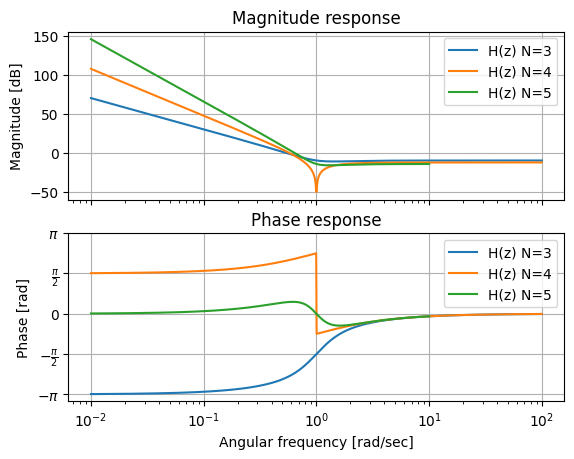

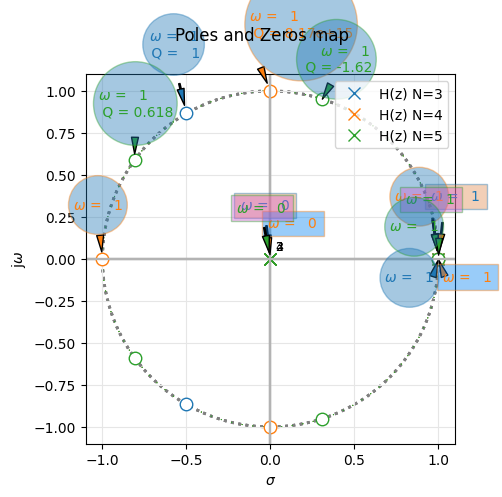

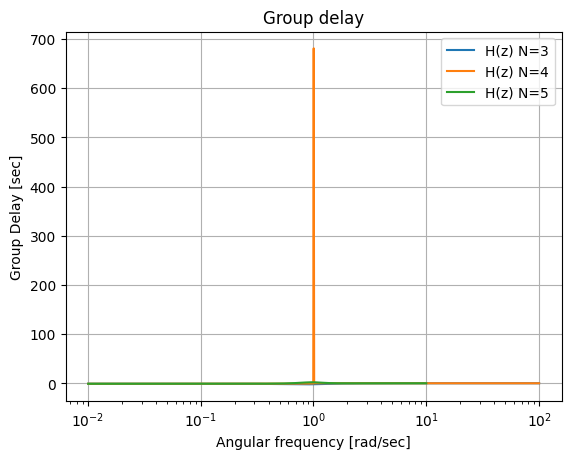

In [132]:
##############################################################################
#
# FILTRO DE MEDIA MOVIL
#
##############################################################################


init_printing()  # Inicializa la impresión en Jupyter

plt.close('all')

all_sys = []
all_sys_desc = []

w0 = 1
qq1 = np.sqrt(2)/2


# Definimos la variable Z
z = sp.symbols('z')

# Valores de N
N_values = ([3, 4, 5])

# Definir la función de transferencia para cada valor de N
for N in N_values:    
    a0 = 1
    a1 = 1
    a2 = 0

    b0 = 1 / N
    b1 = 0
    b2 = 0

    c1 = 1
    
    n = sp.expand(1 - c1 * z**(-N)) * (b0*(z*z) + b1*z + b2) 
    D = sp.expand(z*z / a0 - a1*z - a2)
    
    H_simplified = sp.simplify(n/D)
    
    
    print_latex(a_equal_b_latex_s('H', H_simplified))
    
    num, den = sp.fraction(H_simplified)

    num = sp.Poly(num,z)
    den = sp.Poly(den,z)
    
    numz = np.array(num.all_coeffs()).astype(np.float64)
    denz = np.array(den.all_coeffs()).astype(np.float64)

    my_df = sig.TransferFunction(numz, denz, dt=1/N)

my_tf3 = TransferFunction( [1/3 , 0 , 0 , -1/3]       , [1, -1, 0, 0])
my_tf4 = TransferFunction( [1/4 , 0 , 0 , 0, -1/4]    , [1, -1, 0, 0, 0])
my_tf5 = TransferFunction( [1/5 , 0 , 0 , 0, 0, -1/5] , [1, -1, 0, 0, 0, 0])

_= analyze_sys([my_tf3], sys_name='H(z) N=3') 
_= analyze_sys([my_tf4], sys_name='H(z) N=4') 
_= analyze_sys([my_tf5], sys_name='H(z) N=5') 

<img src="b_zoom_groupdelay.png" style="width:650px ; height:500px">

<img src="Enunciado1_c.png" style="width:600px ; height:100px">

> <img src="c_a'.jpg" style="width:700px ; height:850px">
> <img src="c_b'.jpg" style="width:700px ; height:850px">

/home/franco/.local/lib/python3.10/site-packages/scipy/signal/_ltisys.py:3914: RuntimeWarning: divide by zero encountered in log10
  mag = 20.0 * numpy.log10(abs(y))
/home/franco/.local/lib/python3.10/site-packages/scipy/signal/_ltisys.py:3914: RuntimeWarning: divide by zero encountered in log10
  mag = 20.0 * numpy.log10(abs(y))


(6, <Axes: xlabel='$\\Re(z)$', ylabel='$\\Im(z)$'>)

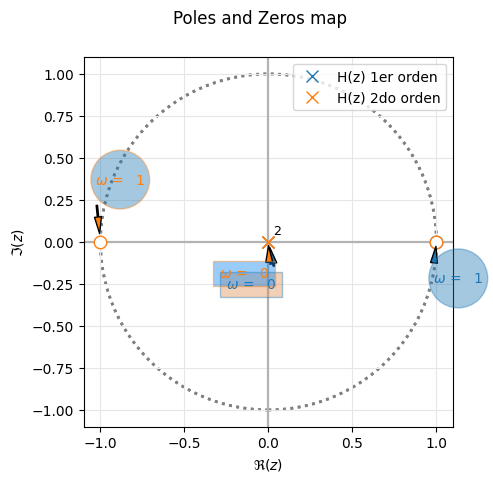

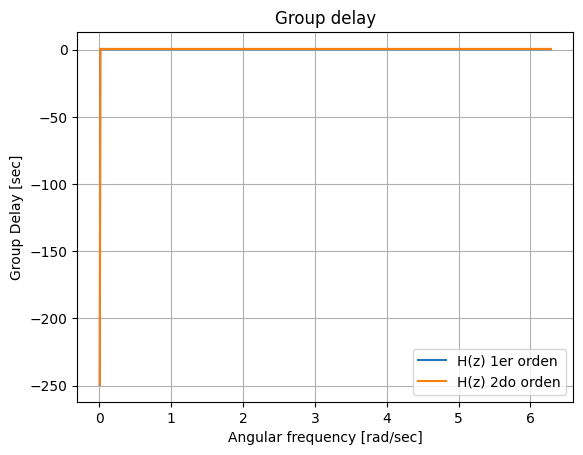

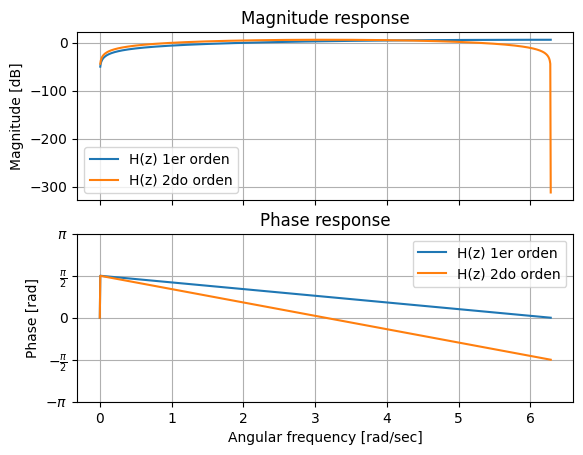

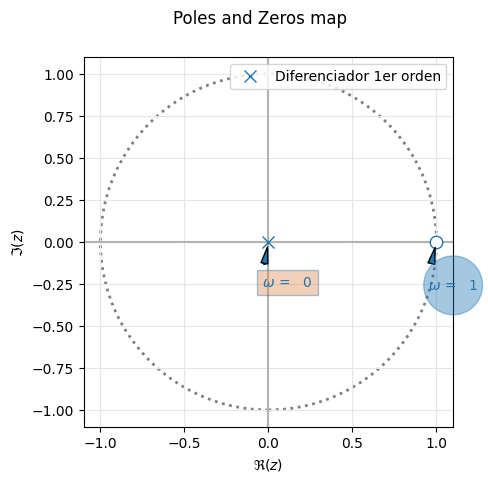

<Figure size 640x480 with 0 Axes>

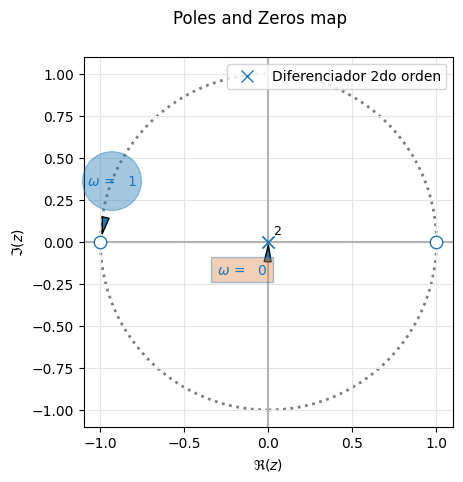

In [144]:
##############################################################################
# 
# FILTRO DIFERENCIADOR
# 
# ##############################################################################\

# %matplotlib inline
plt.close('all')

my_tf_1erOrden = TransferFunction( [1 , -1]     , [1 , 0] , dt=1/2)
my_tf_2doOrden = TransferFunction( [1 , 0 , -1] , [1, 0, 0] , dt=1/2)

_= analyze_sys([my_tf_1erOrden], sys_name='H(z) 1er orden') 
_= analyze_sys([my_tf_2doOrden], sys_name='H(z) 2do orden') 

plt.figure(1)
pzmap(my_tf_1erOrden, annotations=True, filter_description='Diferenciador 1er orden', axes_hdl='none', digital=True)

plt.figure(2)
pzmap(my_tf_2doOrden, annotations=True, filter_description='Diferenciador 2do orden', axes_hdl='none', digital=True)


# num1 = np.array([1, -1])
# num2 = np.array([1, 0, -1])


# all_sys = []
# all_sys_desc = []

# num1 = np.array([1, -1])
# den1 = np.array([1, 0])

# num2 = np.array([1, 0, -1])
# den2 = np.array([1, 0, 0])

# wrad1, hh1 = sig.freqz(num1, den1)
# wrad2, hh2 = sig.freqz(num2, den2)

# ww1 = wrad1 / np.pi
# ww2 = wrad2 / np.pi

# Hc1 = sig.TransferFunction(num1, den1, dt=1/2)
# Hc2 = sig.TransferFunction(num2, den2, dt=1/2)

# _= analyze_sys([Hc1], sys_name='H(z) 1er Orden') 
# _= analyze_sys([Hc2], sys_name='H(z) 2do Orden') 

# #Diferenciador 1er orden
# plt.figure(1)
# plt.subplot(2, 1, 1)
# plt.plot(ww1, np.abs(hh1))
# plt.title('Módulo del filtro FIR Diferenciador 1er orden')
# plt.ylabel('Módulo')

# plt.figure(2)
# plt.subplot(2, 1, 2)
# plt.plot(ww1, np.angle(hh1))
# plt.title('Fase del filtro FIR Diferenciador 1er orden')
# plt.ylabel('Fase (radianes)')
# plt.xlabel('Frecuencia (rad/muestra)')



# #Diferenciador 2do orden
# plt.figure(4)
# plt.subplot(2, 1, 1)
# plt.plot(ww2, np.abs(hh2))
# plt.title('Módulo del filtro FIR Diferenciador 2do orden')
# plt.ylabel('Módulo')

# plt.figure(5)
# plt.subplot(2, 1, 2)
# plt.plot(ww2, np.angle(hh2))
# plt.title('Fase del filtro FIR Diferenciador 2do orden')
# plt.ylabel('Fase (radianes)')
# plt.xlabel('Frecuencia (rad/muestra)')

# plt.figure(1)
# pzmap(my_tf_1erOrden, annotations=False, filter_description='Diferenciador 1er orden', axes_hdl='none', digital=True)

# plt.figure(2)
# pzmap(my_tf_2doOrden, annotations=False, filter_description='Diferenciador 2do orden', axes_hdl='none', digital=True)

# plt.tight_layout()

<img src="Enunciado1_d.png" style="width:600px ; height:100px">

> <img src="1_d.jpg" style="width:700px ; height:850px">

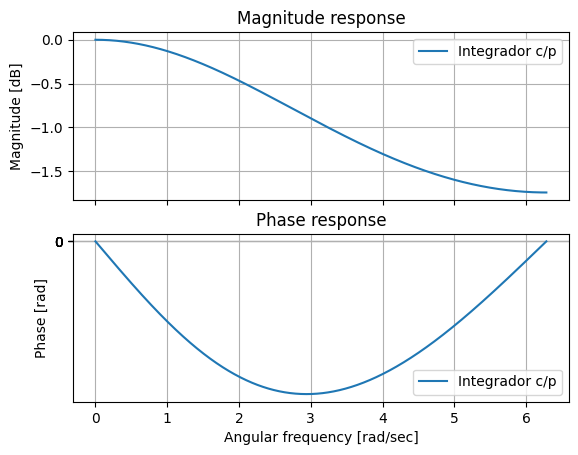

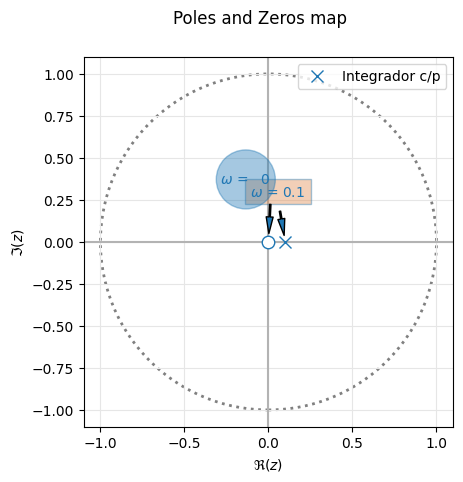

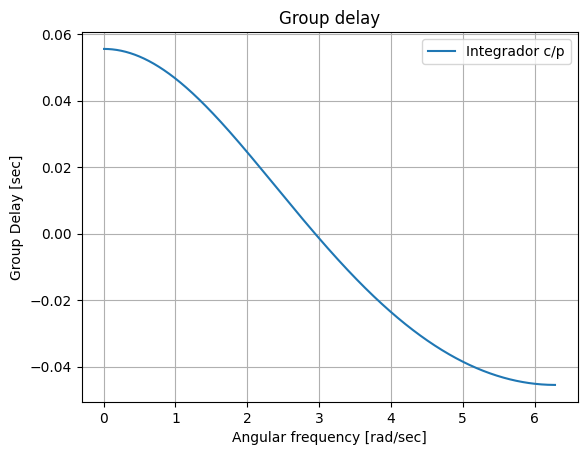

In [149]:
##############################################################################
# 
# FILTRO INTEGRADOR CON PERDIDAS
# 
##############################################################################

plt.close('all')

alpha = 0.9

my_tf_integrador = TransferFunction( [alpha , 0] , [1 , -(1-alpha)] , dt=1/2 )
_= analyze_sys([my_tf_integrador], sys_name='Integrador c/p') 

# numd = np.array([alpha, 0])
# dend = np.array([1, -(1-alpha)])

# wrad, hh = sig.freqz(numd, dend)

# ww = wrad / np.pi

# Hd = sig.TransferFunction(numd, dend, dt=1/2)

# plt.figure(1)
# plt.subplot(2, 1, 1)
# plt.plot(ww, np.abs(hh))
# plt.title('Módulo del filtro Integrador con perdidas')
# plt.ylabel('Módulo')

# plt.figure(2)
# plt.subplot(2, 1, 2)
# plt.plot(ww, np.angle(hh))
# plt.title('Fase del filtro Integrador con perdidas')
# plt.ylabel('Fase (radianes)')
# plt.xlabel('Frecuencia (rad/muestra)')

# plt.figure(3)
# pzmap(Hd, annotations=False, filter_description=None, fig_id='none', axes_hdl='none', digital=True)

# plt.tight_layout()

<img src="Enunciado1_e.png" style="width:600px ; height:100px">

> <img src="1_e.jpg" style="width:700px ; height:850px">

/home/franco/.local/lib/python3.10/site-packages/scipy/signal/_ltisys.py:3914: RuntimeWarning: divide by zero encountered in log10
  mag = 20.0 * numpy.log10(abs(y))
/home/franco/.local/lib/python3.10/site-packages/scipy/signal/_ltisys.py:3914: RuntimeWarning: divide by zero encountered in log10
  mag = 20.0 * numpy.log10(abs(y))


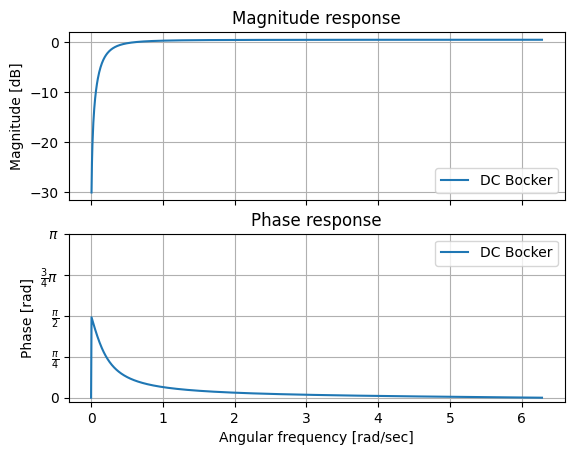

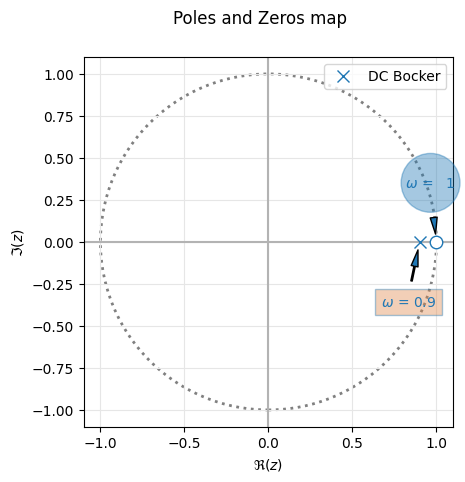

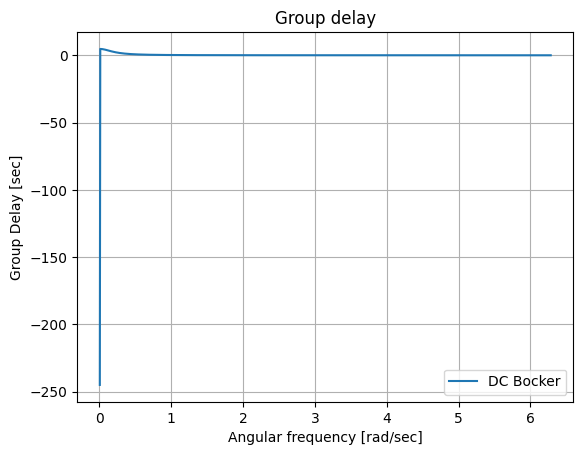

In [151]:
##############################################################################
# 
# FILTRO ELIMINA CONTINUA (DC BLOCKER)
# 
##############################################################################

alpha = 0.9

my_tf_DCBlocker = TransferFunction( [1 , -1] , [1 , -alpha] , dt=1/2)
_= analyze_sys([my_tf_DCBlocker], sys_name='DC Bocker') 

# nume = np.array([1, -1])
# dene = np.array([1, -alpha])

# wrad, hhe = sig.freqz(num1, den1)

# wwe = wrad / np.pi

# He = sig.TransferFunction(nume, dene, dt=1/2)

# plt.figure(1)
# plt.subplot(2, 1, 1)
# plt.plot(wwe, np.abs(hhe))
# plt.title('Módulo del filtro DC Brocker')
# plt.ylabel('Módulo')

# plt.figure(2)
# plt.subplot(2, 1, 2)
# plt.plot(wwe, np.angle(hhe))
# plt.title('Fase del filtro DC Brocker')
# plt.ylabel('Fase (radianes)')
# plt.xlabel('Frecuencia (rad/muestra)')

# plt.figure(3)
# pzmap(hhe, annotations=False, filter_description=None, fig_id='none', axes_hdl='none', digital=True)

# plt.tight_layout()

<img src="Enunciado1_f.png" style="width:720px ; height:190px">

> <img src="1_f'.jpg" style="width:700px ; height:850px">

2) Se dispone del siguiente filtro digital:
   <center><img src="image1.png" style="width:300px ; height:200px"><center>

- a) Para la transferencia del filtro con M = 2 y α=0.8; calcular 1) el diagrama de polos y ceros y la respuesta en frecuencia de 2) módulo, 3) fase y 4) retardo de grupo.

- b) Si quisiéramos anular una senoidal interferente de 125 Hz y su armónica de 375 Hz y sólo dispone de un sumador y el filtro de la figura con M = 4. Proponga un esquema de la solución y calcule los parámetros del filtro que sería necesario adecuar.



a)

> <img src="2_a1.jpg" style="width:700px ; height:800px">
> <img src="2_a2.jpg" style="width:700px ; height:800px">

<IPython.core.display.Math object>

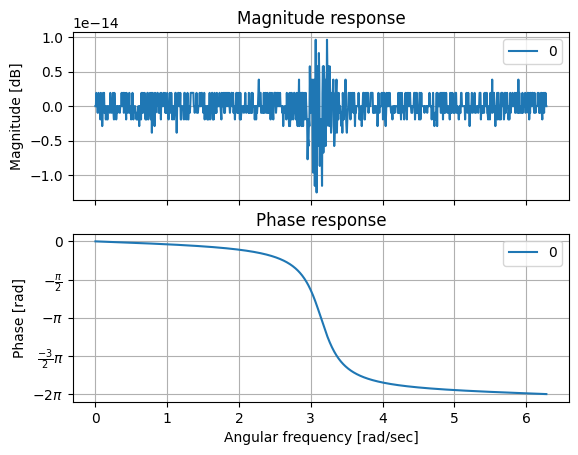

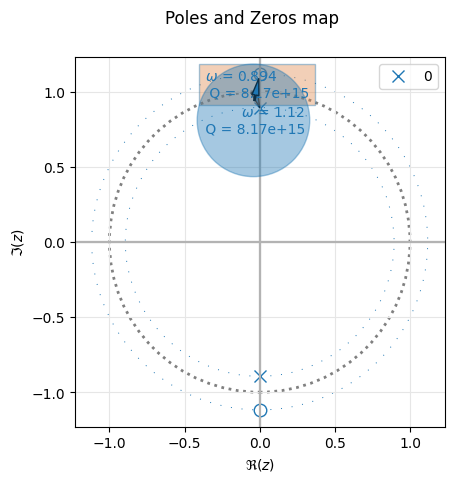

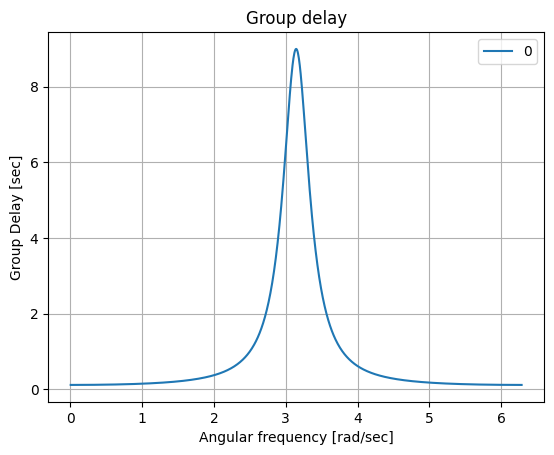

In [154]:
##############################################################################
# 
# 2 a)
# 
##############################################################################
# %matplotlib inline

alpha = 0.8
M = 2

# my_tf_2a = TransferFunction( [1 , -1] , [1 , -alpha] )
# _= analyze_sys([my_tf_2a], sys_name='DC Bocker') 

z = sp.symbols('z')

N2 = sp.expand( alpha * z**M + 1 ) 
D2 = sp.expand( z**M + alpha )
    
H_simplified_2 = sp.simplify(N2/D2)

print_latex(a_equal_b_latex_s('H(z)', H_simplified_2))
    
num2, den2 = sp.fraction(H_simplified_2)

num2 = sp.Poly(num2,z)
den2 = sp.Poly(den2,z)
    
numz2 = np.array(num2.all_coeffs()).astype(np.float64)
denz2 = np.array(den2.all_coeffs()).astype(np.float64)

my_df2 = sig.TransferFunction(numz2, denz2, dt=1/2)

_= analyze_sys([my_df2]) 


b)
